In [82]:
## Import Libraries 
import numpy as np                            ## adds powerful data structures to python to perform mathematical operations on arrays.
import pandas as pd                           ## library perform general eda.
import seaborn as sns                         ## data visualization library based on matplotlib to provide statistical graphs. 
from matplotlib import pyplot as plt          ## creates quality static, animated, and visualizations in python.
import plotly.express as px
import time
import warnings
warnings.filterwarnings("ignore")             ## controls whether warnigns are ignored, displayed, or turned into errors.

In [83]:
## Load the dataset
df = pd.read_csv("/Users/kevineddy/Desktop/Data Projects/Superstore-timeseries/train.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

### Data Cleaning

In [85]:
# fixing null values
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [86]:
df[df['Postal Code'].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [87]:
# add postal code for Burlington, VT
df['Postal Code'].fillna(5401,inplace=True)

In [88]:
# test isnull
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [89]:
# fix column datatypes
df.sample(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
3141,3142,US-2015-122959,12/12/2015,12/12/2015,Same Day,CY-12745,Craig Yedwab,Corporate,United States,San Antonio,Texas,78207.0,Central,OFF-BI-10003650,Office Supplies,Binders,GBC DocuBind 300 Electric Binding Machine,210.392
8263,8264,CA-2016-138457,13/09/2016,17/09/2016,Standard Class,AM-10705,Anne McFarland,Consumer,United States,Jacksonville,North Carolina,28540.0,South,OFF-BI-10000014,Office Supplies,Binders,Heavy-Duty E-Z-D Binders,13.092


In [90]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9800 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

In [92]:
## drop row id
df = df.drop(['Row ID'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9800 non-null   object        
 1   Order Date     9800 non-null   datetime64[ns]
 2   Ship Date      9800 non-null   datetime64[ns]
 3   Ship Mode      9800 non-null   object        
 4   Customer ID    9800 non-null   object        
 5   Customer Name  9800 non-null   object        
 6   Segment        9800 non-null   object        
 7   Country        9800 non-null   object        
 8   City           9800 non-null   object        
 9   State          9800 non-null   object        
 10  Postal Code    9800 non-null   float64       
 11  Region         9800 non-null   object        
 12  Product ID     9800 non-null   object        
 13  Category       9800 non-null   object        
 14  Sub-Category   9800 non-null   object        
 15  Product Name   9800 n

### Data Analysis & Visualizations

In [93]:
## 1) Top 15 Cities with Highest Sales
top_cities = df.groupby('City').sum().sort_values('Sales', ascending=False).head(15)

top_cities['Sales'] = top_cities['Sales'].round(2)
top_cities = top_cities.reset_index()

In [94]:
fig = px.bar(top_cities, x ='City', y ='Sales', title = 'Top 15 Cities with Highest Sales')
fig.show()

In [95]:
## 2) Top 15 States with the highest Sales
top_states = df.groupby('State').sum().sort_values('Sales', ascending=False).head(15)

top_states['Sales'] = top_states['Sales'].round(2)
top_states = top_states.reset_index()

In [96]:
fig = px.bar(top_states, x='State', y='Sales', title='Top 15 States with Highest Sales')
fig.show()

In [97]:
## 3) Shipping Mode
fig = px.pie(df, names = 'Ship Mode', title= 'Ship Mode', values=np.ones(df.shape[0]), color_discrete_sequence=px.colors.sequential.RdBu)

fig.show()

In [98]:
## 4) Customer Segments
fig = px.pie(df, names='Segment', title='Segment', values=np.ones(df.shape[0]), color_discrete_sequence=px.colors.sequential.Aggrnyl)

fig.show()

In [99]:
## 5) Category
fig = px.pie(df, names='Category', title='Category', values=np.ones(df.shape[0]), color_discrete_sequence=px.colors.sequential.algae)

fig.show()

In [100]:
## 6) Which Category has the most sales
top_sales_category = df.groupby('Category').sum()['Sales'].reset_index()

fig = px.pie(top_sales_category, names='Category', values='Sales', title='Category with most Sales', color_discrete_sequence=px.colors.sequential.deep)

fig.show()

In [101]:
## 7) Sub-Category
fig = px.pie(df,names='Sub-Category', values=np.ones(df.shape[0]), title='Sub-Category', color_discrete_sequence=px.colors.sequential.Mint)

fig.show()

In [102]:
## 8) Region with the Most Sales 
top_sales_region = df.groupby('Region').sum().reset_index()

fig = px.pie(top_sales_region, names='Region', values='Sales', title='Regions With The Highest Sales', color_discrete_sequence=px.colors.sequential.Darkmint)

fig.show()

In [103]:
## 9) Segment with the Most Sales 
top_sales_segment = df.groupby('Segment').sum().reset_index()

fig = px.pie(top_sales_segment, names='Segment', values='Sales', title='Segment With The Highest Sales', color_discrete_sequence=px.colors.sequential.RdBu)

fig.show()

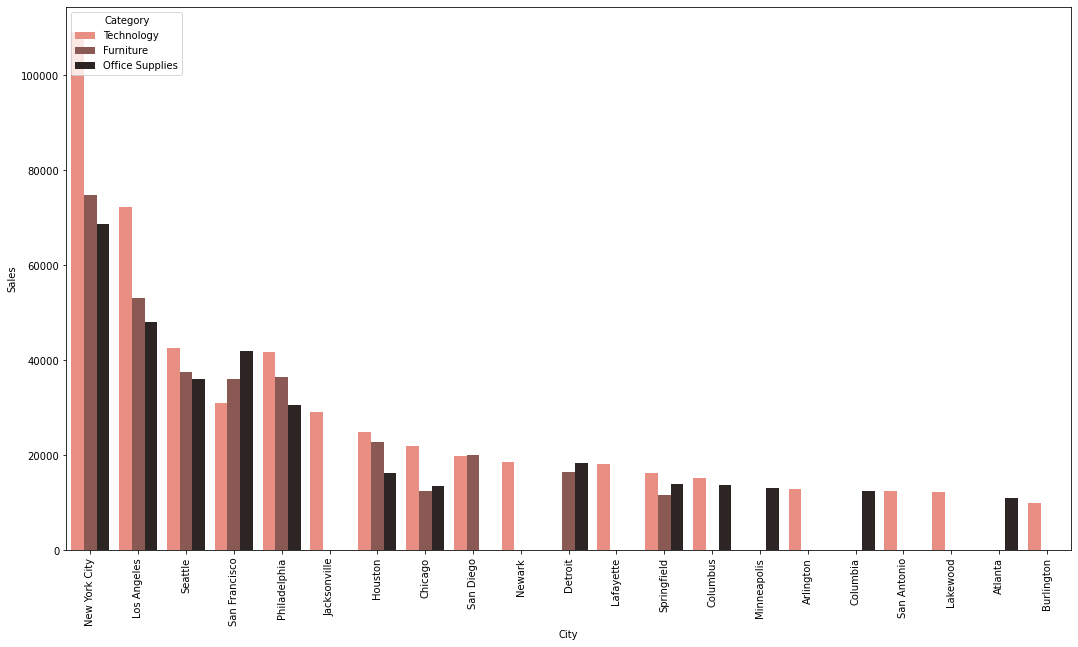

In [104]:
## 9) Top Category Across City By Sales
plt.figure(figsize=(18,10))

top_cities = df.groupby(['Category','City']).sum().sort_values('Sales',ascending=False).head(40)
top_cities= top_cities[['Sales']].round(2)
top_cities.reset_index(inplace=True)

sns.barplot(x='City',y='Sales',hue='Category',data=top_cities,palette='dark:salmon_r')
plt.xticks(rotation='vertical')
plt.show()

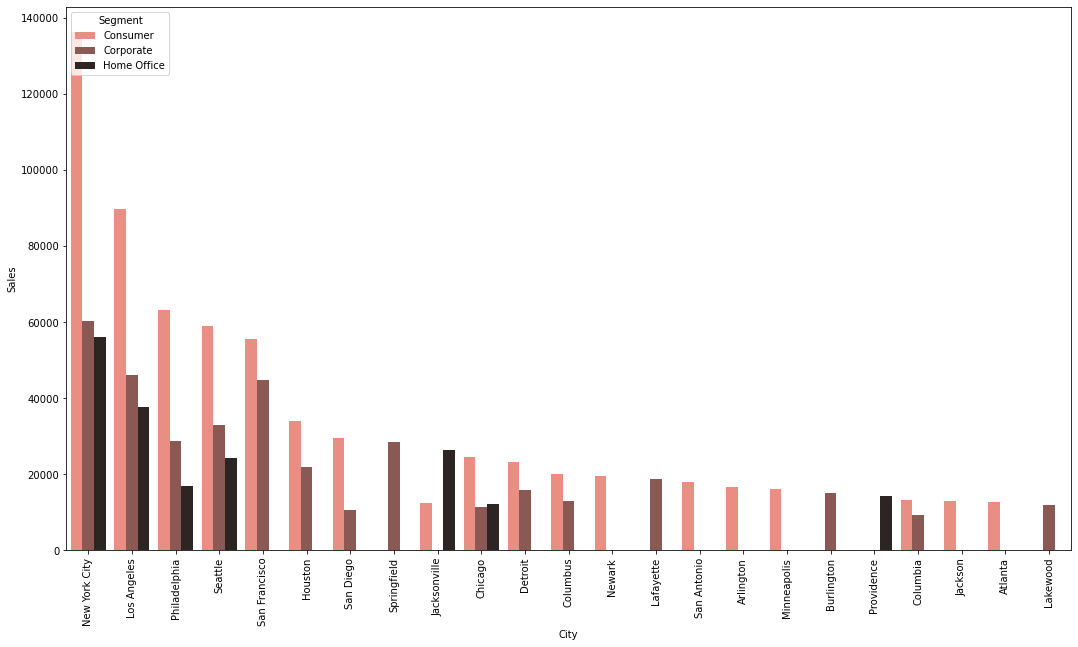

In [105]:
## 10) Top Segment Across City by Sales
plt.figure(figsize= (18,10))

top_cities = df.groupby(['City', 'Segment']).sum().sort_values('Sales', ascending=False).head(40)
top_cities = top_cities[['Sales']].round(2)
top_cities.reset_index(inplace=True)

sns.barplot(x='City',y='Sales', hue='Segment', data=top_cities, palette='dark:salmon_r')
plt.xticks(rotation='vertical')
plt.show()

#### Analysis Overview
- NYC has the most sales across cities
- California has the most sales across states
- Standard Shipping Class was the most used shipping option
- The largest segment of customers were consumers
- Most orders were of Office Supplies 
- Technology products consisted of the most sales
- The majority of orders consisted of Office Supplies
- Most orders consisted of binders
- The West Region was the largest contributor of sales
- Consumers contributed to the majority of sales
- Using the last two figures, we can identify the most popular categories and consumer segemts across the top performing cities. This info will allow us better personalize ad campaigns across these regions as well as make better sales projections.

#### Additional EDA 

In [106]:
# sorting data by order date
#df.sort_values(by=['Order Date'], inplace=True, ascending=True)

In [107]:
# setting the index to be the date will help later when we start forecasting 
#f.set_index("Order Date", inplace=True)

In [108]:
# Identify the most valuable customers
# valueable customer are those who buy more frequently or higher ticket items

#sort customers by sales
top_customers = df.groupby(["Customer Name"]).sum().sort_values("Sales", ascending=False).head(15)

#round sales by 2 decimal places
top_customers = top_customers[['Sales']].round(2)

#because we used groupby we'll need to reset the index to include the customer names into the df
top_customers.reset_index(inplace=True)

In [109]:
# create bar graph
fig = px.bar(top_customers, x ='Customer Name', y ='Sales', title = 'Most Valuable Customers')
fig.show()

In [113]:
# identify what years df includes
df['Order Date'].dt.year.unique()

array([2017, 2016, 2015, 2018])

<AxesSubplot:>

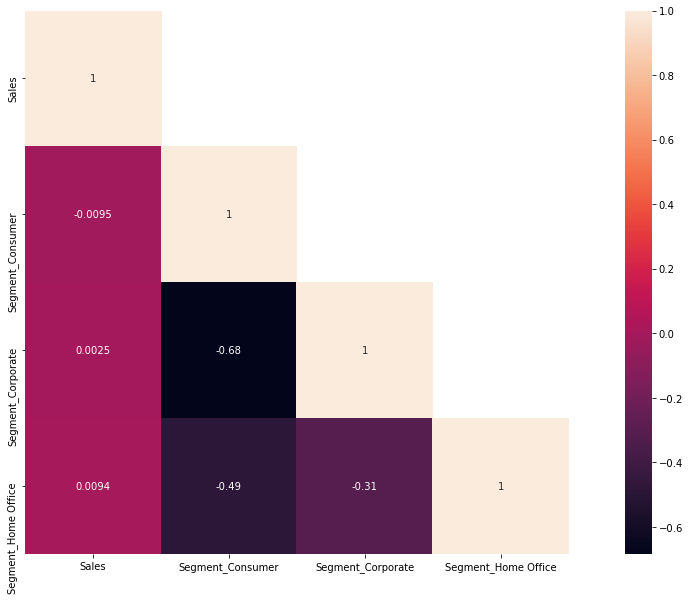

In [120]:
# Correlation Features
# By plotting a correlation matrix, we'll be able to see how well the features are related to one another.  For a Pandas dataframe, we can
# use the call .corr which by defualt provides the Pearson Correlation values of the columns pairwise in that dataframe.

df1 = df[['Segment', 'Sales']]
df_cat = pd.get_dummies(df1)
cor_mat = df_cat.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)]=False
fig = plt.gcf()
fig.set_size_inches(20,10)
sns.heatmap(data = cor_mat, mask = mask, square=True, annot=True, cbar=True)


<AxesSubplot:>

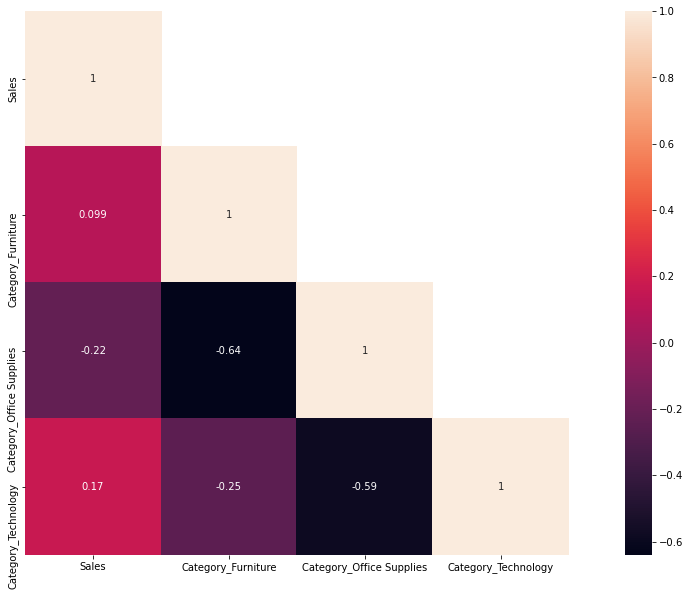

In [122]:
df1 = df[['Category', 'Sales']]
df_cat = pd.get_dummies(df1)
cor_mat = df_cat.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)]=False
fig = plt.gcf()
fig.set_size_inches(20,10)
sns.heatmap(data=cor_mat, mask=mask, square=True, annot=True, cbar=True)

<AxesSubplot:>

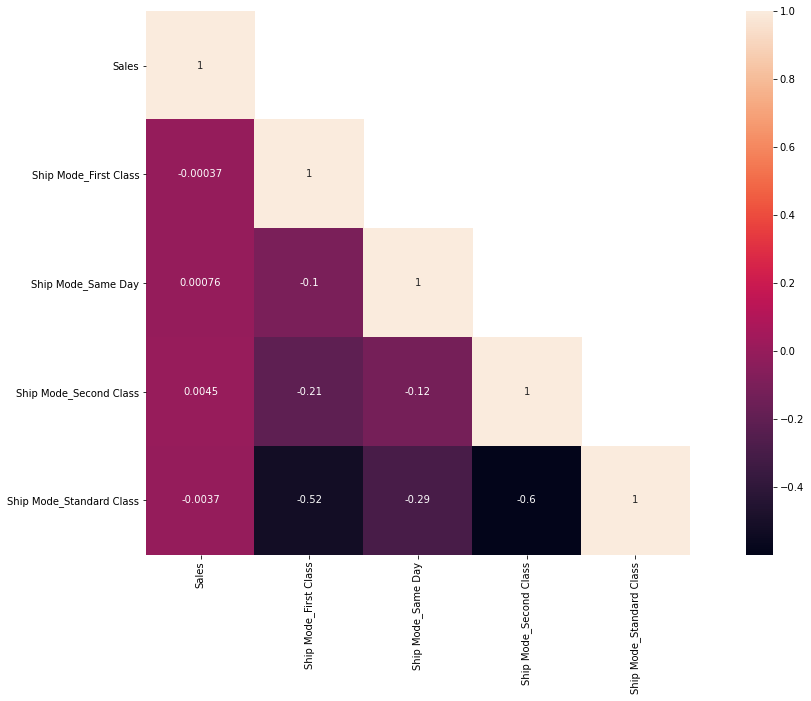

In [123]:
df1 = df[['Ship Mode', 'Sales']]
df_cat = pd.get_dummies(df1)
cor_mat = df_cat.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)]=False
fig = plt.gcf()
fig.set_size_inches(20,10)
sns.heatmap(data = cor_mat, mask = mask, square = True, annot=True, cbar=True)